# Data augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary for the training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks are not available. This is where the Data Augmentation technique comes in, which, as its name indicates, allows us to increase our dataset in two ways





*   Introducing disturbances in the original data. For example: taking an original image centered, replicating it off-center, inverting axes...
*   Using different distributions. Ex: if we want to train a model to classify high resolution images, we add low resolution images, with noise... always keeping the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

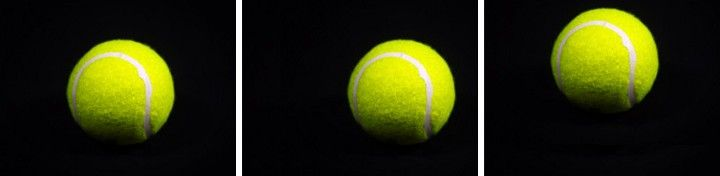



The same ball with different traslations



So if we work with images, we only need to make some small alterations to our dataset and we can achieve our goal.
There are many ways to increase data with images, such as


1.  Flip
2.   Rotation

1.   Scale
2.  Cutting

1.   Translation
2.   Gaussian noise









The Keras library provides the ability to use automatic data augmentation when training a model. This is achieved through the use of the ImageDataGenerator class. A variety of techniques are supported, as well as pixel scaling methods, such as



*   Image changes (translations) through the width_shift_range and height_shift_range arguments. **width_shift_range** y **height_shift_range**.
*  Flipping the image using the arguments horizontal_flip and vertical_flip. **horizontal_flip** y **vertical_flip**.
*   Rotating images through the argument rotation_range **rotation_range**
*   Image brightness using the brightness_range argument. **brightness_range**.
*   Image zoom with the zoom_range argument. **zoom_range**.

Let's look independently at examples of images after they have been zoomed in. It is common to use a variety of magnification techniques at the same time during training


In [7]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


Primero cargamos una imagen de internet


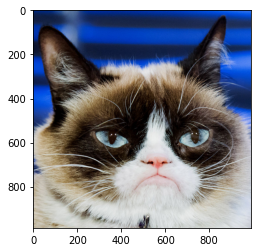

In [8]:
url = 'https://media.wired.com/photos/5cdefb92b86e041493d389df/1:1/w_988,h_988,c_limit/Culture-Grumpy-Cat-487386121.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with an image shift that means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The arguments width_shift_range and height_shift_range of the ImageDataGenerator constructor control the amount of horizontal and vertical shifting respectively.


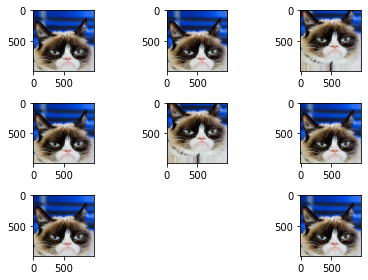

In [9]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing the rows or columns of pixels in the case of a vertical or horizontal rotation, respectively.
The magnification is specified by a Boolean argument **horizontal_flip** o **vertical_flip** for the class **ImageDataGenerator**.

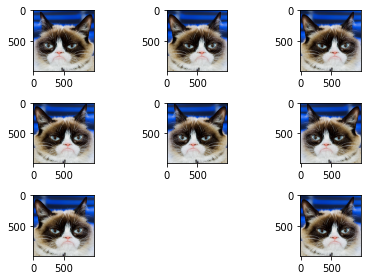

In [12]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is uniformly sampled at random from the zoom region for each dimension (width, height) separately.

  Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range]

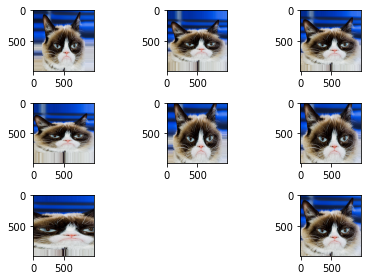

In [10]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a set number of degrees from 0 to 360. This may rotate the pixels out of the image frame and leave areas of the frame without pixel data to be completed.

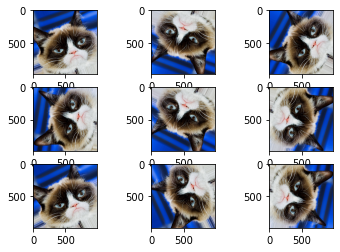

In [11]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data from the dataset to be used, in many jobs an increase of data is used to increase the amount of training images and improve the accuracy of the work.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

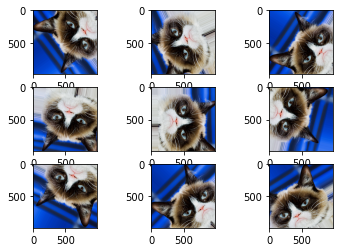

In [13]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now that we consider words, the work required is not so simple given the inherent complexity of language (we cannot replace every word with its synonym and even if we do, we run the risk of the meaning of the sentence changing completely.
There are some libraries that can help us perform this task, we will start by analyzing the following ones:


1.   Text Attack
2.   Google Trans

#ImageDataGenerator

Arguments

directory: string, path to the target directory. It should contain one subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside each of the subdirectories directory tree will be included in the generator. See this script for more details.

target_size: Tuple of integers (height, width), defaults to (256, 256). The dimensions to which all images found will be resized.
color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.

classes: Optional list of class subdirectories (e.g. ['dogs', 'cats']). 

Default: None. If not provided, the list of classes will be automatically inferred from the subdirectory names/structure under directory, where each subdirectory will be treated as a different class (and the order of the classes, which will map to the label indices, will be alphanumeric). The dictionary containing the mapping from class names to class indices can be obtained via the attribute class_indices.
class_mode: One of "categorical", "binary", "sparse", "input", or None. 

Default: "categorical". Determines the type of label arrays that are returned: - "categorical" will be 2D one-hot encoded labels, - "binary" will be 1D binary labels, "sparse" will be 1D integer labels, - "input" will be images identical to input images (mainly used to work with autoencoders). - If None, no labels are returned (the generator will only yield batches of image data, which is useful to use with model.predict()). Please note that in case of class_mode None, the data still needs to reside in a subdirectory of directory for it to work correctly.

batch_size: Size of the batches of data (default: 32).

shuffle: Whether to shuffle the data (default: True) If set to False, sorts the data in alphanumeric order.

seed: Optional random seed for shuffling and transformations.
save_to_dir: None or str (default: None). This allows you to optionally specify a directory to which to save the augmented pictures being generated (useful for visualizing what you are doing).

save_prefix: Str. Prefix to use for filenames of saved pictures (only relevant if save_to_dir is set).
save_format: One of "png", "jpeg" (only relevant if save_to_dir is set). 

Default: "png".
follow_links: Whether to follow symlinks inside class subdirectories (default: False).

subset: Subset of data ("training" or "validation") if validation_split is set in ImageDataGenerator.

interpolation: Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.

# TextAttack
It is a Python framework for opponent attacks, opponent training and NLP data augmentation. We will focus only on data augmentation.

In [19]:
!pip install textattack

In [21]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [30]:
text = "Will you look back on life and say, I wish I had, or I’m glad I did?"

TextAttack provides four methods of data enhancement.


## WordNetAugmenter
Increases the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is an English lexical database. Nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus, since it groups words according to their meaning.



In [22]:
aug = WordNetAugmenter();
aug.augment(text)

['Will you look back on spirit and say, I wish I had, or I’m glad I did?']


## EmbeddingAugmenter
 Increases text by transforming words with their inlays, with a restriction to ensure that their cosine similarity is at least 0.8.


In [23]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Will you look back on life and say, I wishing I had, or I’m glad I did?']

## CharSwapAugmenter
Increase text by substituting, deleting, inserting and exchanging adjacent characters.

In [24]:
aug = CharSwapAugmenter()
aug.augment(text)

['Will you look back on life and may, I wish I had, or I’m glad I did?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All 4 of these features occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [25]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m lifetime glad I did?',
 'Will you look back on lifespan and say, I wish I had, or I’m glad I did?',
 'Will you look back life and say, I wish I had, or I’m glad I did?',
 'Will you look back on life and I, I wish I had, or say’m glad I did?']

Googletrans uses the Google Translate Ajax API for detection and 

1.   List item
2.   List item

language translation.

The key parameters for the method **translate ()** are:



1.   **src**: Source language. This parameter is optional as **googletrans** will detect it.
2.   **dest**: target language. Mandatory parameter

1.   **text**: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then back to the original. During this retranslation, there is a slight change in the sentence between the original text and the retranslated text, but the general meaning of the sentence is still preserved.

Supported languages can be found at https://cloud.google.com/translate/docs/languages?hl=es

To get the best results it is recommended to make some tests with the languages, if the target language is very similar the translation does not lose information, however you can have the problem that the translation is too literal, this becomes a bit of a trial and error problem.


Some examples of languages:


*   Afrikáans	'af'

*   Chinese (simplified) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japanese	'ja'
*   Latin	'la'


*   Spanish	'es'


*   Turkmen	'tk'


*   Yiddish	'yi'

*   Zulu	'zu'



In [26]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.1MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 972kB 7.4MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=a2d2b98a924ec1a19f9313028ef47dcf998527787a88ee7a6e609d89edb2f4b1
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=e2be8244ccaffbe0a730bb283031bdfdf23dac16ac1eee7ee329efcf0475310b
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [27]:
from googletrans import Translator
translator = Translator()

In [31]:
origin_text = "succeding is a little tiring"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='eo').text
print(origin_text)
print(text_trans)
print(final)

succeding is a little tiring
成功するのは少し疲れます
Iom lacigas sukcesi
